In [1]:
%cd ..

D:\anomaly-detection


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

## Synthetic datasets

### Dataset 1

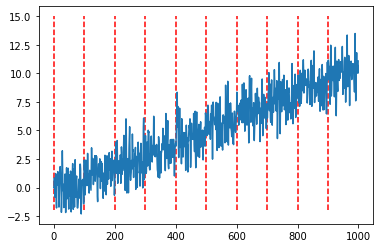

In [13]:
n = 1000
mean = 0
step = 100
true_change_points = []
y = np.zeros(n, dtype=float)
for i in range(2, n):
    if i % step == 0:
        mean += 1
        true_change_points.append(i)
    
    y[i] = y[i-1]*0.6 - y[i-2]*0.5 + mean + np.random.randn()

plt.plot(y)
plt.vlines(list(range(0, n, step)), -2, 15, linestyle='--', colors='r')


(<Figure size 720x144 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x22a492bc5f8>])

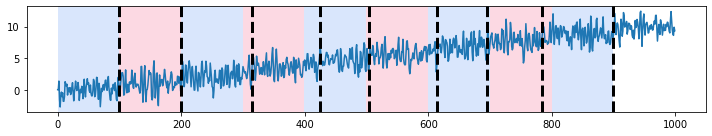

In [4]:
y = y.reshape(-1, 1)
algo = rpt.Pelt(model="rbf", min_size=20, ).fit(y)
result = algo.predict(1)

rpt.display(y, true_change_points, result)

(<Figure size 720x144 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x22a2aece550>])

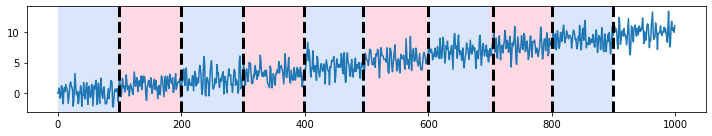

In [14]:
y = y.reshape(-1, 1)
algo = rpt.Dynp(model="rbf", min_size=20, ).fit(y)
result = algo.predict(9)

rpt.display(y, true_change_points, result)

### Dataset 2

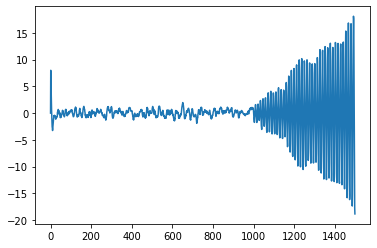

In [15]:
y = [0, 8, 6, 4]

for i in range(4, 1000):
    y.append(0.97 * y[i-1] + 0.4 * y[i - 2] - 0.5 * y[i-3] + 0.2 * np.random.randn())
for i in range(1000, 1500):
    y.append(0.97 * y[i-1] + 0.4 * y[i - 2] - 0.8 * y[i-3] + 0.2 * np.random.randn())

true_change_points = [1000]
plt.plot(y)

(<Figure size 720x144 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x22a2b722198>])

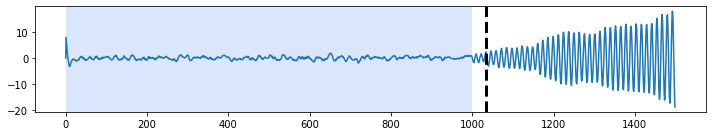

In [16]:
y = np.array(y).reshape(-1, 1)
algo = rpt.Pelt(model="rbf", min_size=20, ).fit(y)
result = algo.predict(pen=20)

rpt.display(y, true_change_points, result)

(<Figure size 720x144 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x22a2b7227f0>])

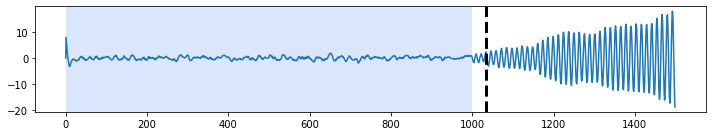

In [17]:
y = np.array(y).reshape(-1, 1)
algo = rpt.Dynp(model="rbf", min_size=20, ).fit(y)
result = algo.predict(1)

rpt.display(y, true_change_points, result)

## Original data

In [7]:
data = pd.read_csv('data/processed/tep_data.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

Len of dataset: 12801


Wall time: 2min 26s


(<Figure size 720x5904 with 41 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A207F2D30>,
       dtype=object))

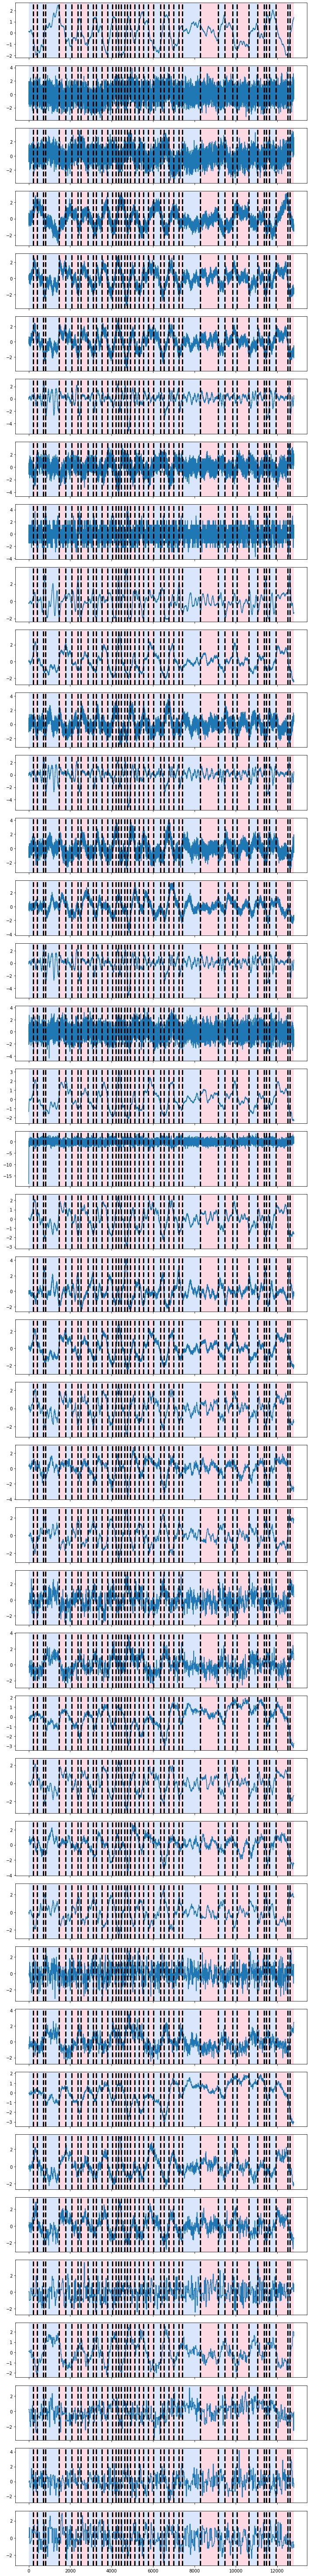

In [11]:
%%time
first_examples_amount = data.shape[0]
signal = data.to_numpy()[:first_examples_amount]

pelt_params = dict(
    model='rbf',
    min_size=20
)

algo = rpt.Pelt(**pelt_params).fit(signal)
result = algo.predict(pen=35)
rpt.display(signal, result, result)